<a href="https://colab.research.google.com/github/curtisjcov/test/blob/master/Health_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
main_data = "/combined_sleep_data-1.csv"

In [18]:
import pandas as pd

# Load the first CSV file with the corrected path
df1 = pd.read_csv('/content/drive/MyDrive/Images/combined_sleep_data-1 (1).csv')

# Display the first 5 rows of the sleep data
print("First 5 rows of combined_sleep_data-1 (1).csv:")
display(df1.head())

First 5 rows of combined_sleep_data-1 (1).csv:


,Date,Sleep Duration,Sleep Score,Quality,Stress Avg,Deep Sleep Duration,Light Sleep Duration,REM Duration,Awake Time,Breathing Variations,Restless Moments,Avg Overnight Heart Rate,Resting Heart Rate,Body Battery Change,Avg SpO₂,Lowest SpO2,Avg Respiration,Lowest Respiration,Avg Overnight HRV,7d Avg HRV
0,2025-08-10,7h 20m,87,Good,14,1h 3m,4h 35m,1h 42m,5m,--,--,--,51 bpm,48,--,--,13 brpm,7 brpm,--,--
1,2025-08-11,6h 51m,74,Fair,19,59m,4h 37m,1h 16m,32m,--,--,--,50 bpm,45,--,--,12 brpm,6 brpm,--,--
2,2025-08-12,8h 0m,87,Good,20,2h 10m,4h 2m,1h 49m,18m,--,--,--,51 bpm,53,--,--,13 brpm,7 brpm,--,--
3,2025-08-13,6h 39m,79,Fair,19,2h 8m,2h 59m,1h 32m,4m,--,--,--,51 bpm,47,--,--,13 brpm,8 brpm,--,--
4,2025-08-15,7h 51m,87,Good,20,1h 38m,4h 34m,1h 39m,4m,--,--,--,49 bpm,34,--,--,12 brpm,8 brpm,--,--


In [19]:
# Load the second CSV file with the corrected path
df2 = pd.read_csv('/content/drive/MyDrive/garmin_health_summary (1).csv')

# Display the first 5 rows of the Garmin health summary data
print("\nFirst 5 rows of garmin_health_summary (1).csv:")
display(df2.head())


First 5 rows of garmin_health_summary (1).csv:


,Date,Steps,Distance (m),Active Calories,Resting HR,Sleep Score,Sleep Duration (h),HRV (Night Avg),Stress Avg,Body Battery Max,Body Battery Min
0,2025-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2026-01-17,13610.0,24713.51,1943.0,66.0,NaN,NaN,NaN,41.0,96.0,40.0
2,2026-01-18,329.0,273.92,10.0,66.0,NaN,NaN,NaN,43.0,62.0,35.0
3,2026-01-19,3574.0,3775.95,439.0,66.0,NaN,NaN,NaN,45.0,95.0,66.0
4,2026-01-20,16193.0,24574.29,2534.0,65.0,NaN,NaN,NaN,21.0,100.0,58.0


In [21]:
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

df1.head()

,Date,Sleep Duration,Sleep Score,Quality,Stress Avg,Deep Sleep Duration,Light Sleep Duration,REM Duration,Awake Time,Breathing Variations,Restless Moments,Avg Overnight Heart Rate,Resting Heart Rate,Body Battery Change,Avg SpO₂,Lowest SpO2,Avg Respiration,Lowest Respiration,Avg Overnight HRV,7d Avg HRV
0,2025-08-10,7h 20m,87,Good,14,1h 3m,4h 35m,1h 42m,5m,--,--,--,51 bpm,48,--,--,13 brpm,7 brpm,--,--
1,2025-08-11,6h 51m,74,Fair,19,59m,4h 37m,1h 16m,32m,--,--,--,50 bpm,45,--,--,12 brpm,6 brpm,--,--
2,2025-08-12,8h 0m,87,Good,20,2h 10m,4h 2m,1h 49m,18m,--,--,--,51 bpm,53,--,--,13 brpm,7 brpm,--,--
3,2025-08-13,6h 39m,79,Fair,19,2h 8m,2h 59m,1h 32m,4m,--,--,--,51 bpm,47,--,--,13 brpm,8 brpm,--,--
4,2025-08-15,7h 51m,87,Good,20,1h 38m,4h 34m,1h 39m,4m,--,--,--,49 bpm,34,--,--,12 brpm,8 brpm,--,--


In [23]:
df1['Date'] = df1['Date'] - pd.Timedelta(days=1)

df1.head()

## I need to line up the days so the sleep is the same night as the data from the day

,Date,Sleep Duration,Sleep Score,Quality,Stress Avg,Deep Sleep Duration,Light Sleep Duration,REM Duration,Awake Time,Breathing Variations,Restless Moments,Avg Overnight Heart Rate,Resting Heart Rate,Body Battery Change,Avg SpO₂,Lowest SpO2,Avg Respiration,Lowest Respiration,Avg Overnight HRV,7d Avg HRV
0,2025-08-09,7h 20m,87,Good,14,1h 3m,4h 35m,1h 42m,5m,--,--,--,51 bpm,48,--,--,13 brpm,7 brpm,--,--
1,2025-08-10,6h 51m,74,Fair,19,59m,4h 37m,1h 16m,32m,--,--,--,50 bpm,45,--,--,12 brpm,6 brpm,--,--
2,2025-08-11,8h 0m,87,Good,20,2h 10m,4h 2m,1h 49m,18m,--,--,--,51 bpm,53,--,--,13 brpm,7 brpm,--,--
3,2025-08-12,6h 39m,79,Fair,19,2h 8m,2h 59m,1h 32m,4m,--,--,--,51 bpm,47,--,--,13 brpm,8 brpm,--,--
4,2025-08-14,7h 51m,87,Good,20,1h 38m,4h 34m,1h 39m,4m,--,--,--,49 bpm,34,--,--,12 brpm,8 brpm,--,--


In [33]:
garmin = pd.merge(df1, df2, on='Date', how='inner')

garmin['Breathing Variations'] = garmin['Breathing Variations'].replace('Few', 2)
garmin['Breathing Variations'] = garmin['Breathing Variations'].replace('Minimal', 1)
garmin['Breathing Variations'] = garmin['Breathing Variations'].replace('--', 0)

#garmin.drop("...")

garmin.head(20)

/tmp/ipython-input-2665456028.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  garmin['Breathing Variations'] = garmin['Breathing Variations'].replace('--', 0)


,Date,Sleep Duration,Sleep Score_x,Quality,Stress Avg_x,Deep Sleep Duration,Light Sleep Duration,REM Duration,Awake Time,Breathing Variations,...,Steps,Distance (m),Active Calories,Resting HR,Sleep Score_y,Sleep Duration (h),HRV (Night Avg),Stress Avg_y,Body Battery Max,Body Battery Min
0,2026-01-22,7h 48m,79,Fair,21,1h 8m,5h 34m,1h 6m,23m,0,...,21882.0,40015.01,3606.0,62.0,NaN,NaN,NaN,29.0,100.0,42.0
1,2026-01-23,8h 26m,58,Poor,19,53m,6h 38m,55m,57m,2,...,23144.0,32233.52,11486.0,59.0,79.0,8.18,40.0,29.0,84.0,31.0
2,2026-01-24,6h 59m,81,Good,13,1h 37m,4h 26m,56m,3m,1,...,11096.0,9866.26,1181.0,58.0,58.0,9.38,48.0,23.0,94.0,31.0
3,2026-01-25,6h 53m,78,Fair,19,1h 16m,4h 10m,1h 27m,18m,1,...,5868.0,9149.55,939.0,55.0,81.0,7.03,55.0,20.0,100.0,43.0
4,2026-01-26,10h 27m,61,Fair,28,1h 8m,6h 45m,2h 34m,1h 17m,1,...,35618.0,37334.00,28662.0,52.0,78.0,7.18,47.0,45.0,90.0,7.0
5,2026-01-28,6h 24m,70,Fair,25,1h 32m,4h 21m,31m,6m,1,...,32144.0,30372.49,8453.0,52.0,NaN,NaN,NaN,47.0,97.0,22.0
6,2026-02-05,8h 6m,91,Excellent,13,51m,4h 59m,2h 16m,11m,2,...,11269.0,14985.92,4138.0,59.0,NaN,NaN,NaN,19.0,95.0,34.0
7,2026-02-06,8h 6m,86,Good,19,1h 47m,4h 51m,1h 29m,15m,1,...,12224.0,10362.44,10297.0,57.0,91.0,8.28,43.0,29.0,100.0,24.0
8,2026-02-07,7h 34m,58,Poor,40,1h 0m,5h 18m,1h 16m,10m,1,...,24776.0,33019.94,8368.0,57.0,86.0,8.66,38.0,42.0,80.0,8.0
9,2026-02-08,10h 25m,76,Fair,21,1h 4m,8h 14m,1h 8m,21m,1,...,6819.0,5677.37,1904.0,57.0,58.0,7.73,30.0,34.0,42.0,7.0


In [66]:
import re

def convert_to_minutes(x):
    if pd.isna(x):
        return None

    hours = 0
    minutes = 0

    h_match = re.search(r'(\d+)h', x)
    m_match = re.search(r'(\d+)m', x)

    if h_match:
        hours = int(h_match.group(1))
    if m_match:
        minutes = int(m_match.group(1))

    return hours * 60 + minutes

#garmin['Sleep Duration'] = garmin['Sleep Duration'].apply(convert_to_minutes)
#garmin['Deep Sleep Duration'] = garmin['Deep Sleep Duration'].apply(convert_to_minutes)
#garmin['Light Sleep Duration'] = garmin['Light Sleep Duration'].apply(convert_to_minutes)
#garmin['REM Duration'] = garmin['REM Duration'].apply(convert_to_minutes)
#garmin['Awake Time'] = garmin['Awake Time'].apply(convert_to_minutes)

df = garmin.drop(columns=['Quality'])
df = df.drop(columns=['Sleep Score_y'])
df = df.drop(columns=['7d Avg HRV'])
df = df.drop(columns=['Sleep Duration (h)'])
df['HRV (Night Avg)'] = df['HRV (Night Avg)'].fillna(df['HRV (Night Avg)'].mean())
df["REM %"] = df['REM Duration']/df['Sleep Duration']*100
df["Deep %"] = df['Deep Sleep Duration']/df['Sleep Duration']*100

df

,Date,Sleep Duration,Sleep Score_x,Stress Avg_x,Deep Sleep Duration,Light Sleep Duration,REM Duration,Awake Time,Breathing Variations,Restless Moments,...,Steps,Distance (m),Active Calories,Resting HR,HRV (Night Avg),Stress Avg_y,Body Battery Max,Body Battery Min,REM %,Deep %
0,2026-01-22,468,79,21,68,334,66,23,0,54,...,21882.0,40015.01,3606.0,62.0,39.076923,29.0,100.0,42.0,14.102564,14.529915
1,2026-01-23,506,58,19,53,398,55,57,2,66,...,23144.0,32233.52,11486.0,59.0,40.000000,29.0,84.0,31.0,10.869565,10.474308
2,2026-01-24,419,81,13,97,266,56,3,1,48,...,11096.0,9866.26,1181.0,58.0,48.000000,23.0,94.0,31.0,13.365155,23.150358
3,2026-01-25,413,78,19,76,250,87,18,1,56,...,5868.0,9149.55,939.0,55.0,55.000000,20.0,100.0,43.0,21.065375,18.401937
4,2026-01-26,627,61,28,68,405,154,77,1,57,...,35618.0,37334.00,28662.0,52.0,47.000000,45.0,90.0,7.0,24.561404,10.845295
5,2026-01-28,384,70,25,92,261,31,6,1,37,...,32144.0,30372.49,8453.0,52.0,39.076923,47.0,97.0,22.0,8.072917,23.958333
6,2026-02-05,486,91,13,51,299,136,11,2,35,...,11269.0,14985.92,4138.0,59.0,39.076923,19.0,95.0,34.0,27.983539,10.493827
7,2026-02-06,486,86,19,107,291,89,15,1,48,...,12224.0,10362.44,10297.0,57.0,43.000000,29.0,100.0,24.0,18.312757,22.016461
8,2026-02-07,454,58,40,60,318,76,10,1,41,...,24776.0,33019.94,8368.0,57.0,38.000000,42.0,80.0,8.0,16.740088,13.215859
9,2026-02-08,625,76,21,64,494,68,21,1,52,...,6819.0,5677.37,1904.0,57.0,30.000000,34.0,42.0,7.0,10.880000,10.240000


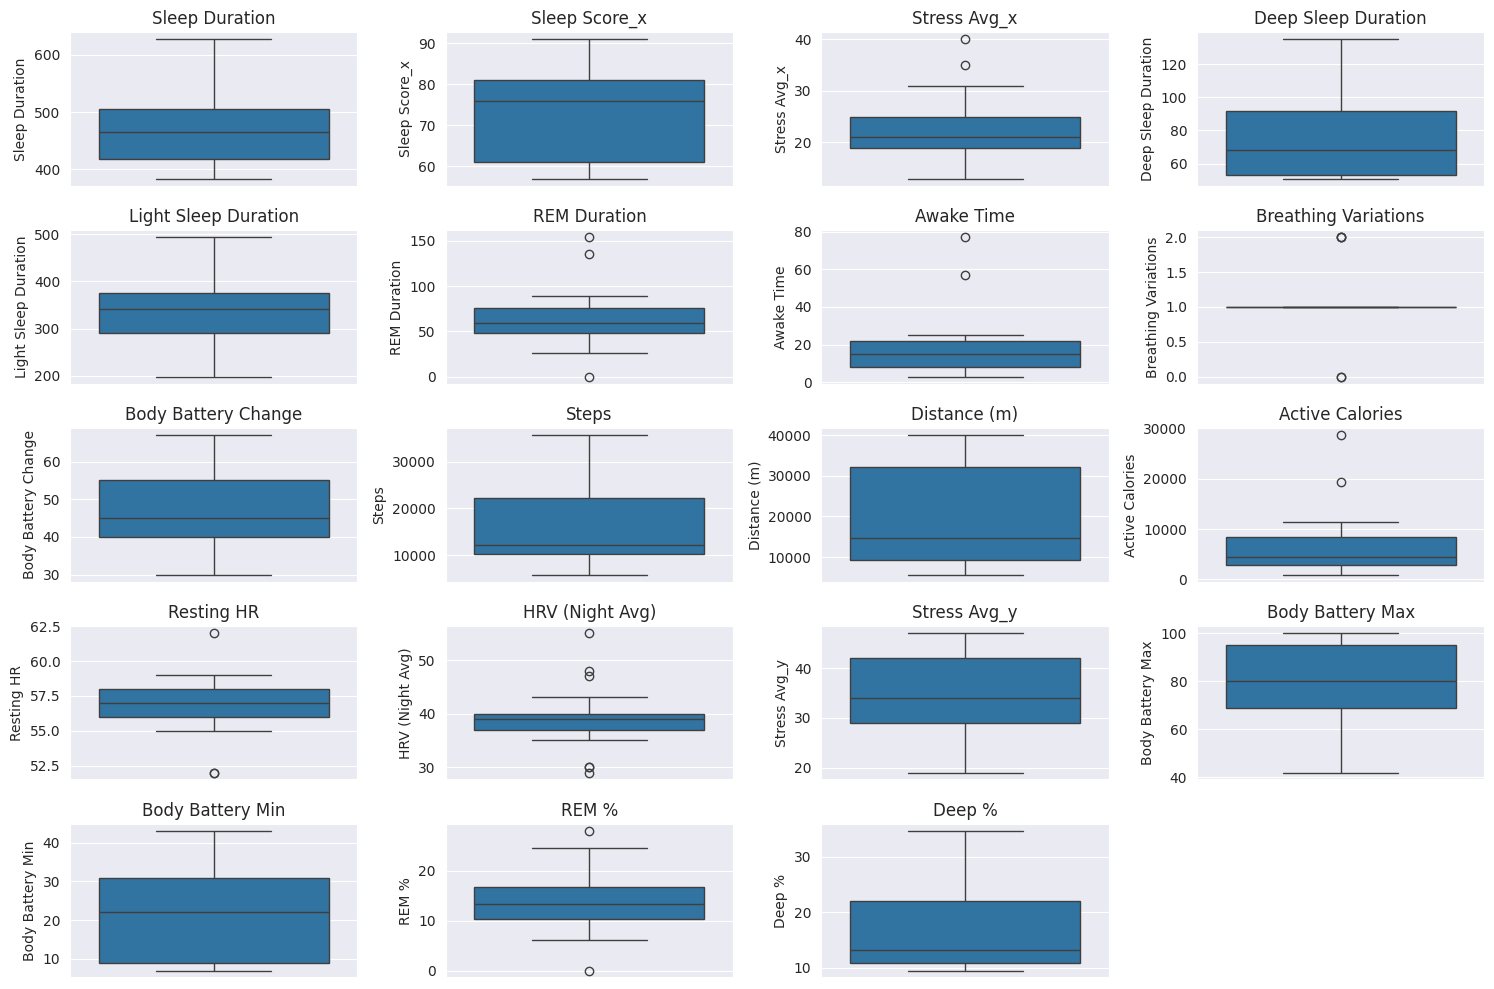

In [63]:


plt.figure(figsize=(15, 10))


import math

num_cols = len(df.select_dtypes(include=np.number).columns)
cols = 4  # columns in the grid
rows = math.ceil(num_cols / cols)  # calculate how many rows needed

for i, column in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [83]:

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

ValueError: could not convert string to float: '58 bpm'

<Figure size 1500x1000 with 0 Axes>

In [84]:
# Clean the 'Resting HR' column
df['Resting HR'] = pd.to_numeric(
    df['Resting HR'].astype(str)        # make everything a string
       .str.replace('BPM', '', regex=False)  # remove 'BPM'
       .str.strip(),                    # remove any extra spaces
    errors='coerce'                     # turn any non-numeric into NaN
)

print(df['Resting HR'].dtype)  # should print float64
print(df['Resting HR'].head(20))

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

#

float64
0     62.0
1     59.0
2     58.0
3     55.0
4     52.0
5     52.0
6     59.0
7     57.0
8     57.0
9     57.0
10    57.0
11    56.0
12    56.0
13    57.0
14    57.0
15    57.0
16    58.0
Name: Resting HR, dtype: float64


ValueError: could not convert string to float: '58 bpm'

<Figure size 1500x1000 with 0 Axes>

In [88]:
for col in df.columns:
    if df[col].dtype == object and df[col].str.contains('BPM', na=False).any():
        df[col] = pd.to_numeric(
            df[col].str.replace('BPM', '', regex=False).str.strip(),
            errors='coerce'
        )

numeric_cols = df.select_dtypes(include=np.number).columns
print("Numeric columns:", numeric_cols)



Numeric columns: Index(['Sleep Duration', 'Sleep Score_x', 'Stress Avg_x',
       'Deep Sleep Duration', 'Light Sleep Duration', 'REM Duration',
       'Awake Time', 'Breathing Variations', 'Body Battery Change', 'Steps',
       'Distance (m)', 'Active Calories', 'Resting HR', 'HRV (Night Avg)',
       'Stress Avg_y', 'Body Battery Max', 'Body Battery Min', 'REM %',
       'Deep %'],
      dtype='object')


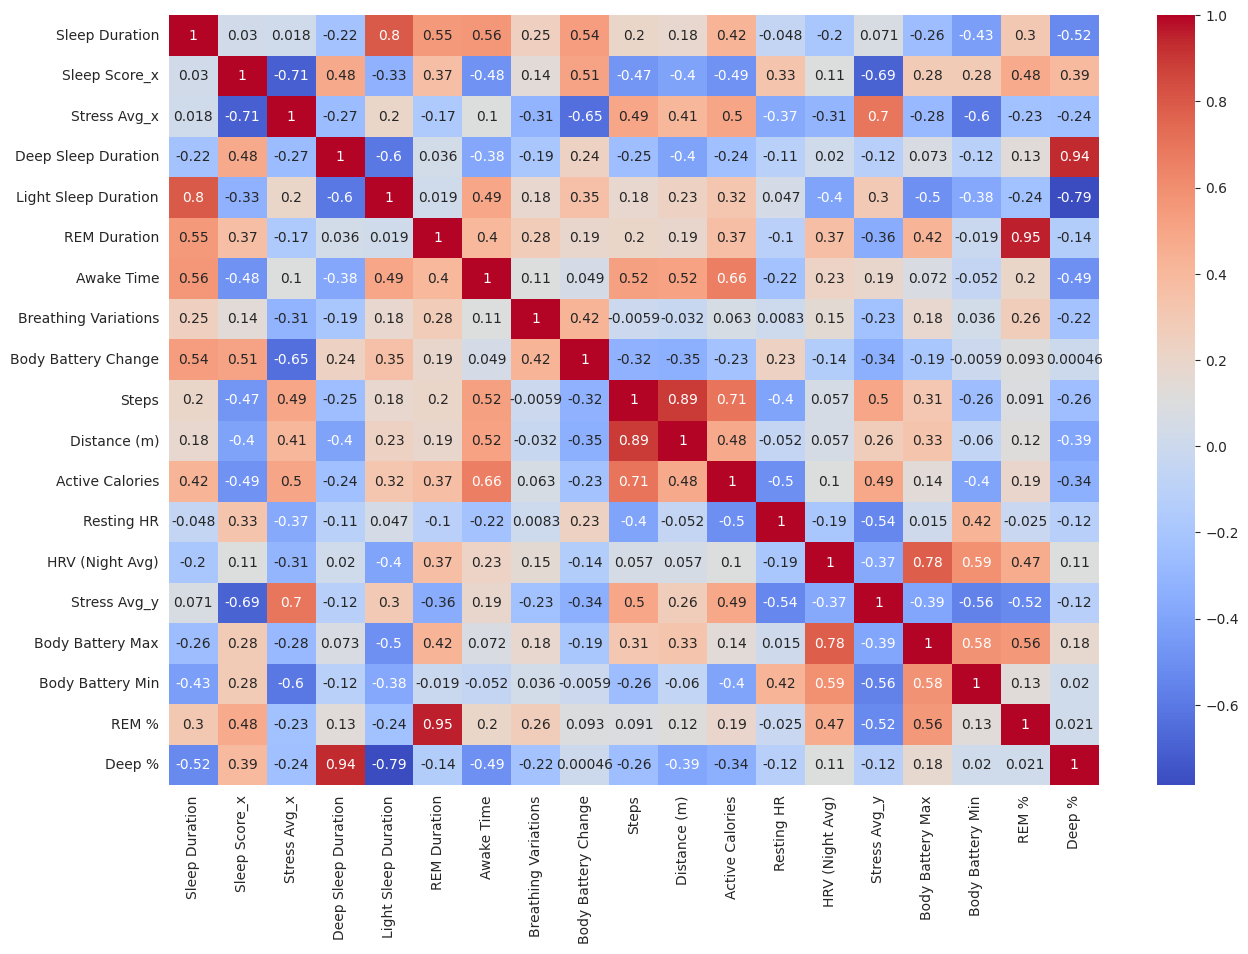

In [89]:
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [87]:
print(list(df.columns))

['Date', 'Sleep Duration', 'Sleep Score_x', 'Stress Avg_x', 'Deep Sleep Duration', 'Light Sleep Duration', 'REM Duration', 'Awake Time', 'Breathing Variations', 'Restless Moments', 'Avg Overnight Heart Rate', 'Resting Heart Rate', 'Body Battery Change', 'Avg SpO₂', 'Lowest SpO2', 'Avg Respiration', 'Lowest Respiration', 'Avg Overnight HRV', 'Steps', 'Distance (m)', 'Active Calories', 'Resting HR', 'HRV (Night Avg)', 'Stress Avg_y', 'Body Battery Max', 'Body Battery Min', 'REM %', 'Deep %']


In [93]:
X_names = ['Steps', 'Distance (m)', 'Resting HR', 'Stress Avg_y','Body Battery Max', 'Body Battery Min']

y_name1 = ['REM %']
y_name2 = ['Deep %']

In [97]:
scaler = StandardScaler()
df[X_names] = scaler.fit_transform(df[X_names])

X_train, X_test, y_train, y_test = train_test_split(df[X_names], df[y_name1], test_size=0.2, shuffle=True)





R^2: 0.26008156052542153


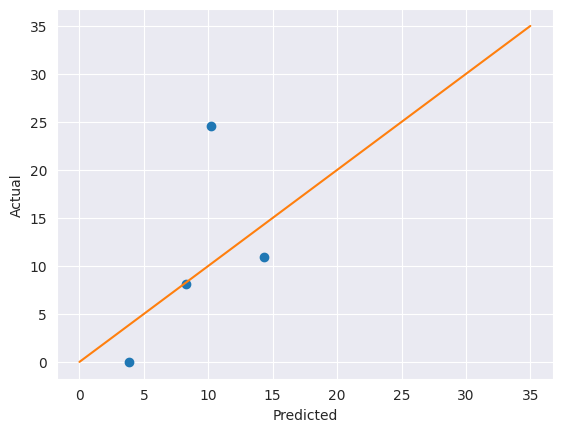

In [100]:
from sklearn.linear_model import Ridge

lin_model = Ridge(alpha=1.0, fit_intercept=True, max_iter=5000)

lin_model.fit(X_train, y_train)

y_pred0 = lin_model.predict(X_test)


plt.plot(y_pred0,y_test,'o')
plt.plot([0,35],[0,35])

plt.xlabel("Predicted")
plt.ylabel("Actual")

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred0)

print("R^2:", r2)

R^2: -0.008571386337280273


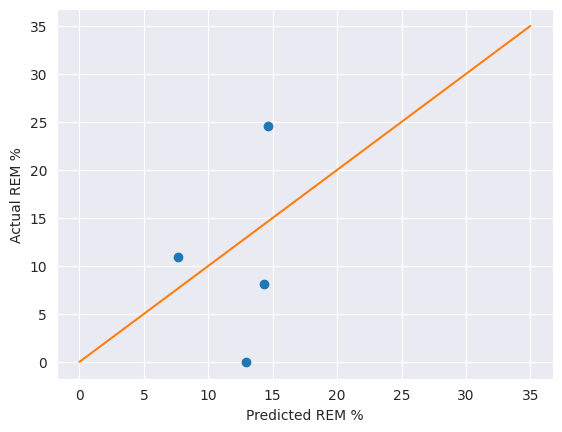

In [102]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(n_estimators=1000, learning_rate = .2,max_depth = 7)


xgb_model.fit(X_train, y_train)

y_pred2 = xgb_model.predict(X_test)


plt.plot(y_pred2,y_test,'o')
plt.plot([0,35],[0,35])
plt.xlabel("Actual REM %")
plt.ylabel("Predicted REM %")

r2_xgb = r2_score(y_pred2, y_test)

print("R^2:", r2_xgb)